In [1]:
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

In [2]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words =10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i,sequences in enumerate(sequences):
        results[i, sequences] = 1
        return results
x_train = vectorize_sequences(train_data)
y_train = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential()
model.add(Dense(16, input_shape=(10000, ), activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

c:\Users\harsh\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss = 'mse', metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 20, verbose = 1, batch_size = 512)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5014 - loss: 0.2500 - val_accuracy: 0.4933 - val_loss: 0.2500
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5037 - loss: 0.2500 - val_accuracy: 0.4933 - val_loss: 0.2500
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5047 - loss: 0.2500 - val_accuracy: 0.4933 - val_loss: 0.2500
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5050 - loss: 0.2500 - val_accuracy: 0.4933 - val_loss: 0.2500
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5009 - loss: 0.2500 - val_accuracy: 0.4933 - val_loss: 0.2500
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5030 - loss: 0.2500 - val_accuracy: 0.4933 - val_loss: 0.2500
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5071 - loss: 0.2500 - val_accuracy: 0.4933 - val_loss: 0.2500
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5008 - loss: 0.2500 - val_accuracy: 0.4933 - v

In [10]:
# list all data in history
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


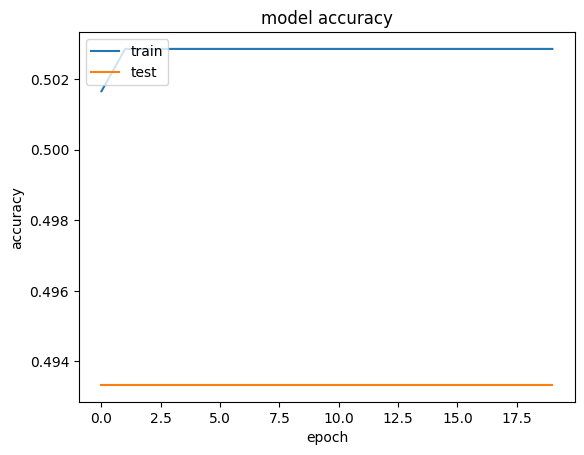

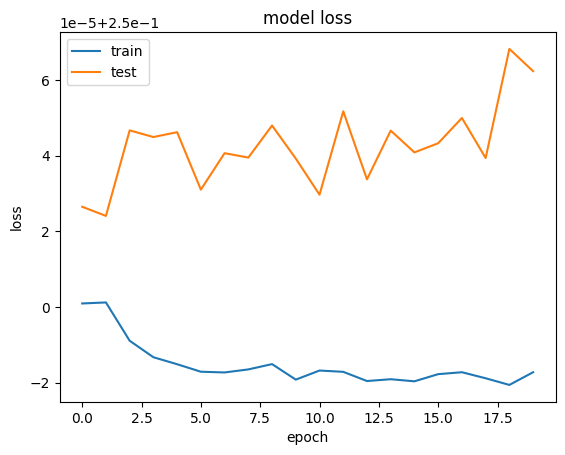

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()